In [1]:
from IPython.display import Image

# PyMOL tutorial

La documentation de PyMOL peut être trouvée à cette adresse :
https://pymol.org/dokuwiki/doku.php?id=start

## 1. PyMOL et python

Les commandes PyMOL peuvent être executées dans un script python grâce à l'importation de la classe 'cmd' depuis la librairie PyMOL :

In [2]:
from pymol import cmd

Cette classe s'utilise avec la syntaxe suivante pour toutes les méthodes de PyMOL : cmd.méthode(arguments)

Exemple pour charger une structure avec la méthode "fetch" :  

In [3]:
cmd.fetch("3OUN")

 PyMOL not running, entering library mode (experimental)
 ExecutiveLoad-Detail: Detected mmCIF


'3OUN'

 Ray: render time: 1.63 sec. = 2214.9 frames/hour (1.63 sec. accum.).


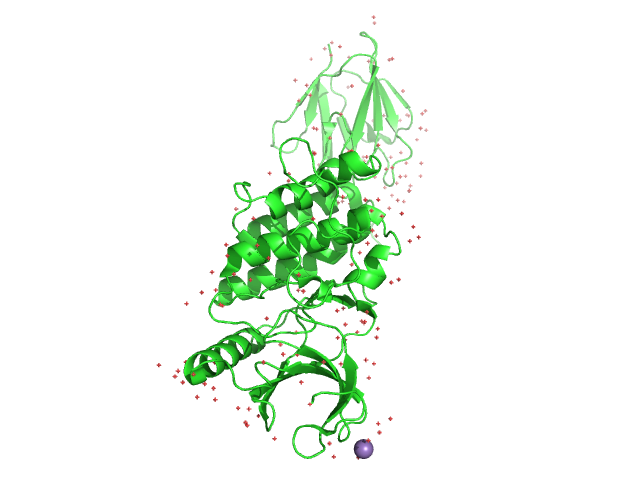

In [4]:
# affichage dans le notebook :
# since PyMOL 2.5:
# cmd.ipython_image()
# before PyMOL 2.5:
cmd.png('/tmp/foo.png', ray=1)
Image(filename='/tmp/foo.png')

Une structure peut être divisée en différentes fragments possèdant chacun un identifiant différent.

## 2. Les différents fragments

### 2.1. Segments
Identifie des fragments déterminées lors du dépôt de la structure complète dans la PDB. Les identifiants sont des lettres attribuées dans l'ordre alphabétique. Il s'agit de la plus petite catégorie de fragments (les identifiants sont donc présent une seule fois pour une structure donnée).  
Dans PyMOL, les segments sont appelés "segi".  

Structure 3OUN colorée (avec la méthode "color") en fonction des différents segments :

In [6]:
cmd.color("orange", "segi A")
cmd.color("gray70", "segi B")
cmd.color("green", "segi C")
cmd.color("blue", "segi D")
cmd.color("purple", "segi E")

 Ray: render time: 1.55 sec. = 2326.7 frames/hour (4.85 sec. accum.).


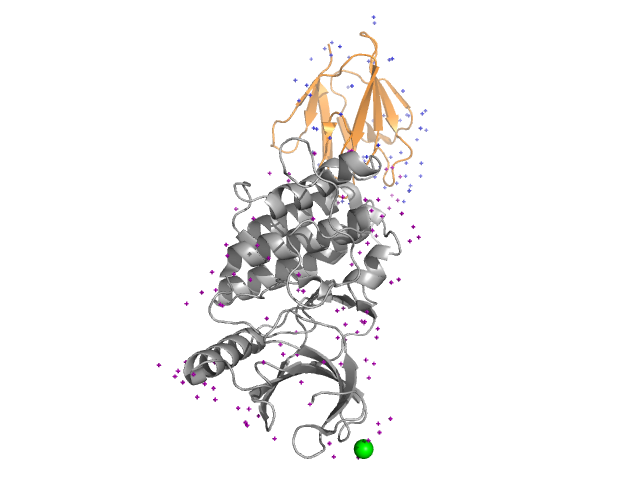

In [8]:
# affichage dans le notebook :
# since PyMOL 2.5:
# cmd.ipython_image()
# before PyMOL 2.5:
cmd.png('/tmp/foo.png', ray=1)
Image(filename='/tmp/foo.png')

On remarque 5 segments différents qui seront donc identifiés de A à E.

### 2.2. Fragments 'Custom'
Identifie les fragments de même nature (ex : solvant). Les identifiants 'custom' sont des chiffres et sont attribués dans l'ordre croissant. Peut regrouper plusieurs segments.  
Dans PyMOL, ces sous-structures sont appelées "custom".  

Structure 3OUN colorée (avec la méthode "color") en fonction des différents fragments 'custom' :

In [9]:
cmd.color("orange", "custom 1")
cmd.color("gray70", "custom 2")
cmd.color("green", "custom 3")
cmd.color("blue", "custom 4")

 Ray: render time: 1.58 sec. = 2272.0 frames/hour (6.43 sec. accum.).


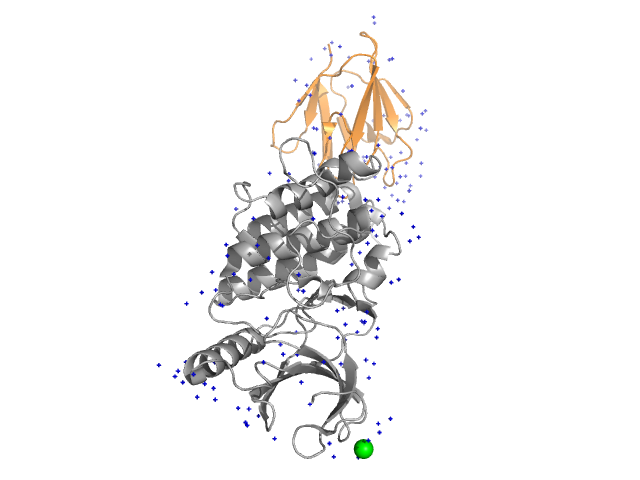

In [10]:
# affichage dans le notebook :
# since PyMOL 2.5:
# cmd.ipython_image()
# before PyMOL 2.5:
cmd.png('/tmp/foo.png', ray=1)
Image(filename='/tmp/foo.png')

On remarque 4 fragments différents qui seront donc identifiés de 1 à 4. La différence entre le nombre de segments et le nombre de fragments 'custom' provient du fait que dans les fragments 'custom', les molécules d'eau ont été regroupées dans le même fragment (colorées en bleu sur l'image), alors qu'elles sont séparées en deux segments différents.

### 2.3. Chaines
Identifie des fragments déterminées par les auteurs ayant résolu la structure. Les identifiants sont des lettres attribuées dans l'ordre alphabétique. Peut regrouper plusieurs segments et donc plusieurs fragments 'custom'.  
Dans PyMOL, les chaines sont appelées "chain".

Structure 3OUN colorée (avec la méthode "color") en fonction des différentes chaines :

In [12]:
cmd.color("orange", "chain A")
cmd.color("gray70", "chain B")

 Ray: render time: 1.55 sec. = 2327.4 frames/hour (7.98 sec. accum.).


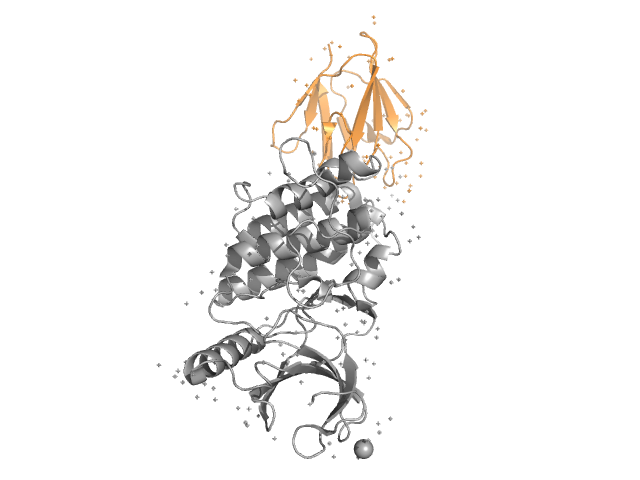

In [13]:
# affichage dans le notebook :
# since PyMOL 2.5:
# cmd.ipython_image()
# before PyMOL 2.5:
cmd.png('/tmp/foo.png', ray=1)
Image(filename='/tmp/foo.png')

On remarque 2 chaines différentes, identifiées donc A et B.

## 3. Selection

Afin d'analyser la structure complète, on a besoin d'analyser chacuns de ces fragments.  
Pour cela nous avons 2 options qui nécessitent les deux une itération de méthodes :  
- itérer la méthode "color" et incrémenter les identifiants des fragments jusqu'à ne plus observer de changement de couleur (**déconseillé car parfois les fragments sont visuellement difficiles à observer si il y a peu d'atomes ou si ils sont "cachés" dans la structure 3D**).  
- itérer la méthode "select" et incrémenter les identifiants des fragments jusqu'à avoir un nombre d'atomes de 0 dans la sélection.  


Nous allons donc utiliser la méthode "select", dont la syntaxe est la suivante :

In [14]:
cmd.select("segi A")

784

Le nombre retourné par la commande correspond au nombre d'atomes présents dans la sélection. Ici 784 atomes sont présents dans le segment A. Lorsque le nombre d'atomes est de 0 alors nous avons atteint le nombre maximal de fragments présents dans la structure. On peut donc trouver le nombre des différents fragments avec une itération de la méthode "select".

In [16]:
print("nombre d'atomes dans le segment A : ", cmd.select("segi A"))
print("nombre d'atomes dans le segment B : ", cmd.select("segi B"))
print("nombre d'atomes dans le segment C : ", cmd.select("segi C"))
print("nombre d'atomes dans le segment D : ", cmd.select("segi D"))
print("nombre d'atomes dans le segment E : ", cmd.select("segi E"))
print("nombre d'atomes dans le segment F : ", cmd.select("segi F"))

nombre d'atomes dans le segment A :  784
nombre d'atomes dans le segment B :  1957
nombre d'atomes dans le segment C :  1
nombre d'atomes dans le segment D :  65
nombre d'atomes dans le segment E :  112
nombre d'atomes dans le segment F :  0


Dans le segment F nous n'avons aucun atomes, il y a donc 5 segments dans la structure 3OUN.

In [15]:
print("nombre d'atomes dans le fragment custom 1 : ", cmd.select("custom 1"))
print("nombre d'atomes dans le fragment custom 2 : ", cmd.select("custom 2"))
print("nombre d'atomes dans le fragment custom 3 : ", cmd.select("custom 3"))
print("nombre d'atomes dans le fragment custom 4 : ", cmd.select("custom 4"))
print("nombre d'atomes dans le fragment custom 5 : ", cmd.select("custom 5"))

nombre d'atomes dans le fragment custom 1 :  784
nombre d'atomes dans le fragment custom 2 :  1957
nombre d'atomes dans le fragment custom 3 :  1
nombre d'atomes dans le fragment custom 4 :  177
nombre d'atomes dans le fragment custom 5 :  0


Dans le fragment "custom" 5 nous n'avons aucun atomes, il y a donc 4 fragments "custom" dans la structure 3OUN.

In [17]:
print("nombre d'atomes dans la chaine A : ", cmd.select("chain A"))
print("nombre d'atomes dans la chaine B : ", cmd.select("chain B"))
print("nombre d'atomes dans la chaine C : ", cmd.select("chain C"))

nombre d'atomes dans la chaine A :  849
nombre d'atomes dans la chaine B :  2070
nombre d'atomes dans la chaine C :  0


Dans la chaine C nous n'avons aucun atomes, il y a donc 2 chaines dans la structure 3OUN.

La plus petite catégorie de fragment sont les segments, on va donc se concentrer sur eux dans l'analyse car ils nous donneront l'information la plus détaillée possible.

### 4. Types

Différents types de molécules peuvent être présentes dans une structure PDB : protéine, ligand, solvant, etc.  
A chaque segment va associé un "type" de molécule afin de nous renseigner sur leur nature. Dans PyMOL, les types peuvent être (la liste complète peut se trouver dans la doc) :  
- solvent (= eau)
- polymer (= protéine)
- inorganic (= ligand inorganique)
- organic (= ligand organique)

Afin de déterminer le type de chaque segment, il faudra utiliser la méthode "select" de la façon suivante :

In [18]:
cmd.select("segi A and solvent")

0

Comme précédemment, le nombre retourné correspond au nombre d'atomes du segment A étant de type "solvent". On test ainsi les types jusqu'à tomber sur le bon.

In [22]:
print("segment A : ", cmd.select("segi A and polymer"))
print("segment B : ", cmd.select("segi B and polymer"))
print("segment C : ", cmd.select("segi C and inorganic"))
print("segment D : ", cmd.select("segi D and solvent"))
print("segment E : ", cmd.select("segi E and solvent"))

segment A :  784
segment B :  1957
segment C :  1
segment D :  65
segment E :  112


Pour la structure 3OUN on a donc le résultat suivant :
- le segment A est de type polymer
- le segment B est de type polymer
- le segment C est de type inorganic
- le segment D est de type solvent
- le segment E est de type solvent

Dans l'interface PyMOL on peut toutefois relativement facilement le deviner visuellement et juste chercher une confirmation. En effet, quand on selectionne à la main un atome dans la structure, sont identifiant est affiché dans le terminal intégré à PyMOL.  
Exemple :  
"You clicked /3OUN/A/A/LEU`72/CA"  
Le message indique, dans l'ordre de gauche à droite : que j'ai sélectionné un acide aminé de la structure 3OUN, présent dans le segment A de la chaine A, qu'il s'agit de la Leucine de numéro 72, et qu'il présente un carbone alpha.

Ainsi si je sélectionne le fragment représenté par une sphère j'obtient :  
"You clicked /3OUN/C/B/MN`283/MN"  
Il s'agit donc d'un atome de manganese (MN), composé inorganique. Il correspond bien au segment C qui ne présente qu'un seul atome.

Afin d'avoir le nombre d'atomes totaux de chaque type on peut également utiliser la méthode "select", avec la syntaxe suivante :

In [25]:
print("nombre d'atomes de type 'solvent' : ", cmd.select("solvent"))
print("nombre d'atomes de type 'polymer' : ", cmd.select("polymer"))
print("nombre d'atomes de type 'inorganic' : ", cmd.select("inorganic"))

nombre d'atomes de type 'solvent' :  177
nombre d'atomes de type 'polymer' :  2741
nombre d'atomes de type 'inorganic' :  1


### 5. Molécules d'eau

Le nombre de molécules d'eau correspond au nombre de molécules de type "solvent". Il faut donc additionner le nombre d'atomes présents dans les segments de type "solvent" afin d'avoir le nombre de molécules d'eau de la structure.

**ATTENTION : parfois les molécules d'eau de la structure PDB sont représentées sous la forme H2O, on doit donc diviser le nombre d'atomes présents dans les segments par 3 afin d'avoir le nombre de molécules d'eau (car il y a 3 atomes par molécules d'eau).**  
On peut vérifier avec la méthode "select" et le mot-clé "element", qui correspond aux atomes, quels sont les atomes présents :

In [24]:
print("nombre d'atomes d'oxygène dans les solvents = ", cmd.select("solvent and element O"))
print("nombre d'atomes de type solvent = ", cmd.select("solvent"))

nombre d'atomes d'oxygène dans les solvents =  177
nombre d'atomes de type solvent =  177


Dans ce cas on a un nombre d'atomes totaux égal au nombre d'atomes d'oxygène présent dans le solvant, on a donc bien 177 molécules d'eau dans la structure. Si le nombre d'atome d'oxygène était 3x inférieur au nombre d'atome total alors il aurait fallu diviser par 3 le nombre d'atomes de solvant pour avoir le nombre de molécule d'eau.  
Concrétement : nombre de molécules d'eau = nombre d'atomes d'oxygène dans le solvant.

### 6. Python

Comme on constate, il faut beaucoup d'itération de méthodes afin de récupérer toutes les informations de base sur notre structure. Un script python est alors bien utile. On inclu les commandes PyMOL "cmd" comme une méthode de n'importe quelle classe python. Exemple :

In [ ]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def get_properties():
    # initialisation d'un dictionnaire pour stocker des informations
    properties = {'entity_id' : [], 'segment_id' : [], 'chaine_id' : [], 'type' : [], 'water_nb' : [], 'nb_atom' : []}

    # récupérer les identifiants des différentes chaines
    chains = cmd.get_chains('all')

    # trouver l'identifiant des segments (unique)
    for letter in alphabet:
        res = cmd.select('segi '+letter)
        if res != 0:
            # stocker l'identifiant dans le dictionnaire
            properties['segment_id'].append(letter)

Ce code permet de stocker les identifiants des différents segments grâce à une iteration automatique sur les lettres de l'alphabet, avec une condition de résultat != 0.